Suppose we have a rectangle with finite lengths $[x_1, x_2] \times [y_1, y_2]$.
We'll use the dimensionless coordinates
$$ u = x \sqrt{\frac{2}{\lambda L}}, \qquad v = y \sqrt{\frac{2}{\lambda L}}, $$
where $k$ is the wavelength of the incoming light and $L = (h^{-1} + h'^{-1})^{-1}$.
(These $h$ and $h'$ are the sensor-plane and plane-detector distances, respectively.)
Also define the Fresnel intgrals
$$ C(s) = \int_0^s \cos \left( \frac{\pi w^2}{2} \right) \,dw, \qquad S(s) = \int_0^s \sin \left( \frac{\pi w^2}{2} \right) \,dw. $$

Diffraction from a straightedge is equivalent to the rectangular case with dimensions $[u_1, u_2] = (-\infty, \infty)$ and $[v_1, v_2] = (-\infty, v_2]$.
The wave function is
$$ \begin{align*}
    U_p &= \frac{U_0}{1 + i} \left[ C(v) + i S(v) \right]_{-\infty}^{v_2} \\
    &= \frac{U_0}{1 + i} \left[ C(v_2) + i S(v_2) + \frac{1}{2} + \frac{1}{2} i \right].
\end{align*} $$
From this, we can calculate the intensity $I_p = |U_p|^2$.





In [18]:
import matplotlib.pyplot as plt
import numpy as np
import csv as csv

# from scipy.stats import norm
from scipy.stats import chi2
from scipy.optimize import curve_fit
from scipy.special import fresnel

In [62]:
# initialize everything

raw_xdata = []
raw_ydata = []
with open('fresnel.csv', mode='r') as f:
    read = csv.reader(f)
    next(read)
    for row in f:
        pair = row.split(',')
        raw_xdata.append(float(pair[0]))
        if row[-1] == 'n':
            raw_ydata.append(float(pair[1][:-1]))
        else:
            raw_ydata.append(float(pair[1]))


xdata = []
ydata = []

for i in range(26):
    xdata += [[x for x in raw_xdata[i::26]]]
    ydata += [[y for y in raw_ydata[i::26]]]

# removing first three data points
xdata = xdata[3:]
ydata = ydata[3:]

yerr = np.std(ydata, axis=1)

x_means = np.mean(xdata, axis=1)
y_means = np.mean(ydata, axis=1)
y_sems = yerr / np.sqrt(len(xdata[0]))

for r in ydata:
    print(r)

# print(x_means)
# print(y_means)
def myfit(x, A, x0, V0, k):
    output = np.empty_like(x)
    is_small = np.isclose(x, x0)
    output[is_small] = V0 + A * 0.25
    output[~is_small] = V0 + A * ( j1(k*(x[~is_small]-x0)) / (k*(x[~is_small]-x0)) )**2
    return output# print(y_sems)

[-5.0, -3.0, -4.0, -2.0, -2.0]
[2.0, 3.0, 4.0, 4.0, 8.0]
[6.0, 8.0, 9.0, 11.0, 14.0]
[11.0, 13.0, 15.0, 17.0, 21.0]
[18.0, 20.0, 22.0, 25.0, 28.0]
[26.0, 29.0, 30.0, 32.0, 32.0]
[33.0, 34.0, 34.0, 37.0, 34.0]
[37.0, 36.0, 35.0, 37.0, 31.0]
[35.0, 33.0, 32.0, 32.0, 25.0]
[30.0, 27.0, 22.0, 25.0, 17.0]
[27.0, 22.0, 19.0, 21.0, 16.0]
[22.0, 19.0, 17.0, 18.0, 15.0]
[19.0, 17.0, 15.0, 17.0, 17.0]
[17.0, 17.0, 17.0, 17.0, 20.0]
[17.0, 18.0, 20.0, 20.0, 25.0]
[18.0, 22.0, 23.0, 24.0, 27.0]
[22.0, 25.0, 27.0, 26.0, 29.0]
[26.0, 28.0, 29.0, 30.0, 28.0]
[31.0, 30.0, 28.0, 29.0, 21.0]
[26.0, 22.0, 20.0, 22.0, 17.0]
[20.0, 19.0, 19.0, 20.0, 23.0]
[21.0, 24.0, 26.0, 26.0, 28.0]
[29.0, 29.0, 28.0, 27.0, 23.0]


[18, 18.1, -15, 7.5]
[16.2502483  18.13279994 -8.88719273  8.53299125]


<ErrorbarContainer object of 3 artists>

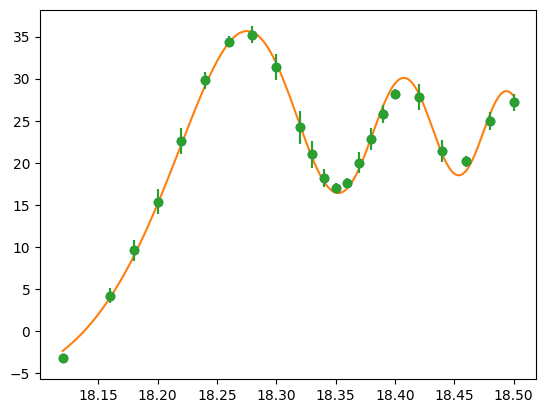

In [63]:
# perform the fit...

def myfit(x, A, x0, V0, k):
    fres_ints = fresnel(k * (x - x0))
    return V0 + A * ((fres_ints[0] + 0.5)**2 + (fres_ints[1] + 0.5)**2)

p0 = [18, 18.1, -15, 7.5]
(popt, pcov) = curve_fit(myfit, x_means, y_means, sigma=y_sems, absolute_sigma=True, p0=p0)
perr = np.sqrt(np.diag(pcov))

# ... and plot it!

plt.errorbar(x_means, y_means, y_sems, fmt='o', linestyle='')

xfit4plot = np.linspace(min(x_means), max(x_means), 1000)
yfit4plot = myfit(xfit4plot, * popt )
plt.plot(xfit4plot, yfit4plot, label = "fit")


print(p0)
print(popt)
# print(pcov)

# def f(x, A, x0, V0, k):
#     return V0 + A * ( j1(k*(x-x0)) / (k*(x-x0)) )**2

x_linspace = np.linspace(min(x_means), max(x_means), 1000)
# y_linspace = myfit(x_linspace, 22.75, 13.01, -0.02, 0.4)

plt.errorbar(x_means, y_means, y_sems, fmt='o', linestyle='')


# x_linspace = np.linspace(min(x_means), max(x_means), 1000)
# y_linspace = myfit(x_linspace, 18, 18.1, -15, 7.5)
# plt.plot(x_linspace, y_linspace)


In [64]:
resids = y_means - myfit(x_means, * popt)
norm_resids = resids/y_sems

chi_sq = sum(norm_resids**2)
print('chi_sq = ' + str(chi_sq))

M = len(x_means)
df = M - len(popt)
red_chi_sq = chi_sq / df

print('red_chi_sq = ' + str(red_chi_sq))

PTE = 1 - chi2.cdf(chi_sq, df=df)
print('PTE = ' + str(PTE))

chi_sq = 15.567940896011894
red_chi_sq = 0.8193653103164155
PTE = 0.6858820489393334


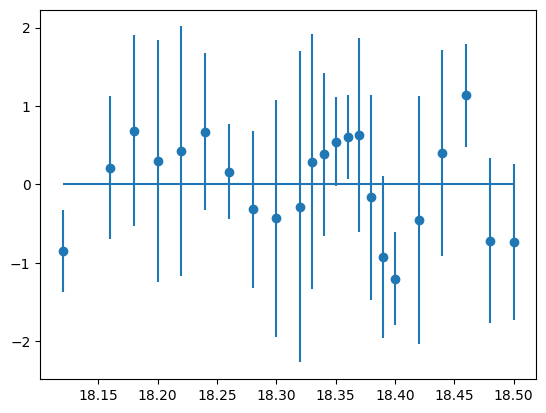

In [65]:
plt.errorbar(x_means, resids, y_sems, fmt="o", label="data")
plt.hlines(0, min(x_means), max(x_means))

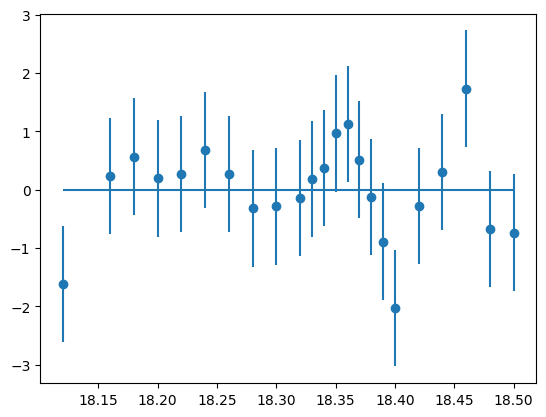

In [66]:
plt.errorbar(x_means, norm_resids, np.ones(len(x_means)), fmt="o", label="data")
plt.hlines(0, min(x_means), max(x_means))